In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [4]:
BASIS_DIR = '/content/gdrive/My Drive/covid/covid'
CLASSES = ["COVID",  "Normal"]

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    shear_range = 0.2,
    zoom_range = 0.2,
    validation_split=0.2
)
test_dataset=image.ImageDataGenerator(
    rescale=1./255
)

In [6]:
# #Image augmentation process:
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     horizontal_flip=True,
#     shear_range = 0.2,
#     zoom_range = 0.2,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     fill_mode = 'nearest',
    
#     #split dataset to training(80%) and validation(20%):
#     validation_split=0.2
# )

In [7]:
train_generator = train_datagen.flow_from_directory(
    directory=BASIS_DIR,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    subset='training',
    classes=CLASSES
)
validation_generator = train_datagen.flow_from_directory(
    directory=BASIS_DIR,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    subset='training',
    classes=CLASSES
)

Found 11047 images belonging to 2 classes.
Found 11047 images belonging to 2 classes.


In [8]:
# # Training dataset and Validation dataset:
# train_data = train_datagen.flow_from_directory(
#     directory=BASIS_DIR,
#     target_size=(299, 299),
#     batch_size=32,
#     shuffle=True,
#     class_mode='binary',
#     subset='training',
#     classes=CLASSES
#     )
# val_data = train_datagen.flow_from_directory(
#     directory=BASIS_DIR,
#     target_size=(299, 299),
#     batch_size=32,
#     shuffle=True,
#     class_mode='binary',
#     subset='validation',
#     classes=CLASSES
#     )

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [10]:
# #Using sequential model:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(299, 299, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),

#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# model.summary()

In [11]:
history =model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data=validation_generator,
    verbose=2
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
8/8 - 4092s - loss: 1.4587 - accuracy: 0.5625 - val_loss: 0.6099 - val_accuracy: 0.7381
Epoch 2/10
8/8 - 650s - loss: 0.5331 - accuracy: 0.7773 - val_loss: 0.6021 - val_accuracy: 0.7381
Epoch 3/10
8/8 - 650s - loss: 0.6269 - accuracy: 0.7227 - val_loss: 0.6421 - val_accuracy: 0.7381
Epoch 4/10
8/8 - 651s - loss: 0.6099 - accuracy: 0.7422 - val_loss: 0.6303 - val_accuracy: 0.7381
Epoch 5/10
8/8 - 650s - loss: 0.6100 - accuracy: 0.7070 - val_loss: 0.5984 - val_accuracy: 0.7381
Epoch 6/10
8/8 - 651s - loss: 0.5721 - accuracy: 0.7500 - val_loss: 0.6161 - val_accuracy: 0.7381
Epoch 7/10
8/8 - 649s - loss: 0.6125 - accuracy: 0.7148 - val_loss: 0.5684 - val_accuracy: 0.7381
Epoch 8/10
8/8 - 647s - loss: 0.6396 - accuracy: 0.7070 - val_loss: 0.6113 - val_accuracy: 0.7381
Epoch 9/10
8/8 - 645s - loss: 0.5489 - accuracy: 0.7891 - val_loss: 0.5661 - val_accuracy: 0.7381
Epoch 10/10
8/8 - 646s - loss: 0.5438 - accuracy: 0.7852 - val_loss: 0.5643 - val_accuracy: 0.7381


In [12]:
# Compiling model with 'adam' optimizer loss function 'binary_crossentropy'
# model.compile(loss='binary_crossentropy',
#               optimizer=tf.optimizers.Adam(),
#               metrics=['accuracy']
#              )

In [13]:
# # Training process:
# number_epochs = 5
# # You can change number_epochs above. But the bigger the value, the more time it takes for training
# history = model.fit(train_data, epochs=number_epochs, 
#                     validation_data=val_data, verbose=2)

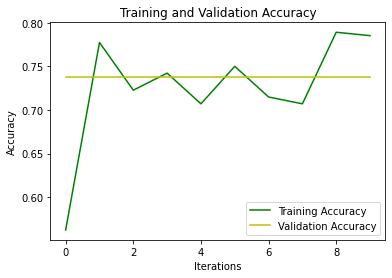

In [14]:
plt.plot(history.history['accuracy'], 'g', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'y', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.legend(loc=0)
plt.show()



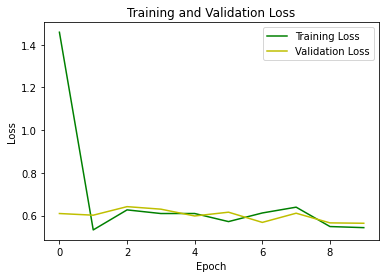

In [15]:
plt.plot(history.history['loss'], 'g', label='Training Loss')
plt.plot(history.history['val_loss'], 'y', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.legend(loc=0)
plt.show()